In [8]:
#before this download the dataset from roboflow
# !git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
# %pip install -r yolov7/requirements.txt

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.7.1-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.22.1-cp310-cp310-win_amd64.whl.metadata (6.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  U

In [1]:
import torch
import os
import torchvision

from IPython.display import Image, clear_output

In [2]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.5.0+cu118 _CudaDeviceProperties(name='NVIDIA GeForce RTX 4050 Laptop GPU', major=8, minor=9, total_memory=6140MB, multi_processor_count=20, uuid=ed19ad29-4b96-0ebc-998d-d3a02269826b, L2_cache_size=24MB)


In [3]:
import yaml
with open("data.yaml",'r')as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# curl -L -o yolov7_training.pt https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
#will work on pytorch <2.5
#not working here in windows+jupyter notebookk that is why have to use the terminal

# !python yolov7/train.py --workers 0 --device 0 --batch-size 8 --data data.yaml --img 320 320 --cfg yolov7/cfg/training/yolov7.yaml --weights yolov7.pt --name yolov7-asl --hyp yolov7/data/hyp.scratch.custom.yaml --epochs 100


YOLOR  v0.1-128-ga207844 torch 2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140.5MB)

Namespace(weights='c:\\Users\\Bhoomi\\Desktop\\Codes\\opencv\\yolo_ASL\\yolov7_training.pt', cfg='c:\\Users\\Bhoomi\\Desktop\\Codes\\opencv\\yolo_ASL\\yolov7\\cfg\\training\\yolov7.yaml', data='c:\\Users\\Bhoomi\\Desktop\\Codes\\opencv\\yolo_ASL\\data.yaml', hyp='c:\\Users\\Bhoomi\\Desktop\\Codes\\opencv\\yolo_ASL\\yolov7\\data\\hyp.scratch.custom.yaml', epochs=100, batch_size=8, img_size=[416, 416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=0, project='runs/train', entity=None, name='yolov7-asl', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=

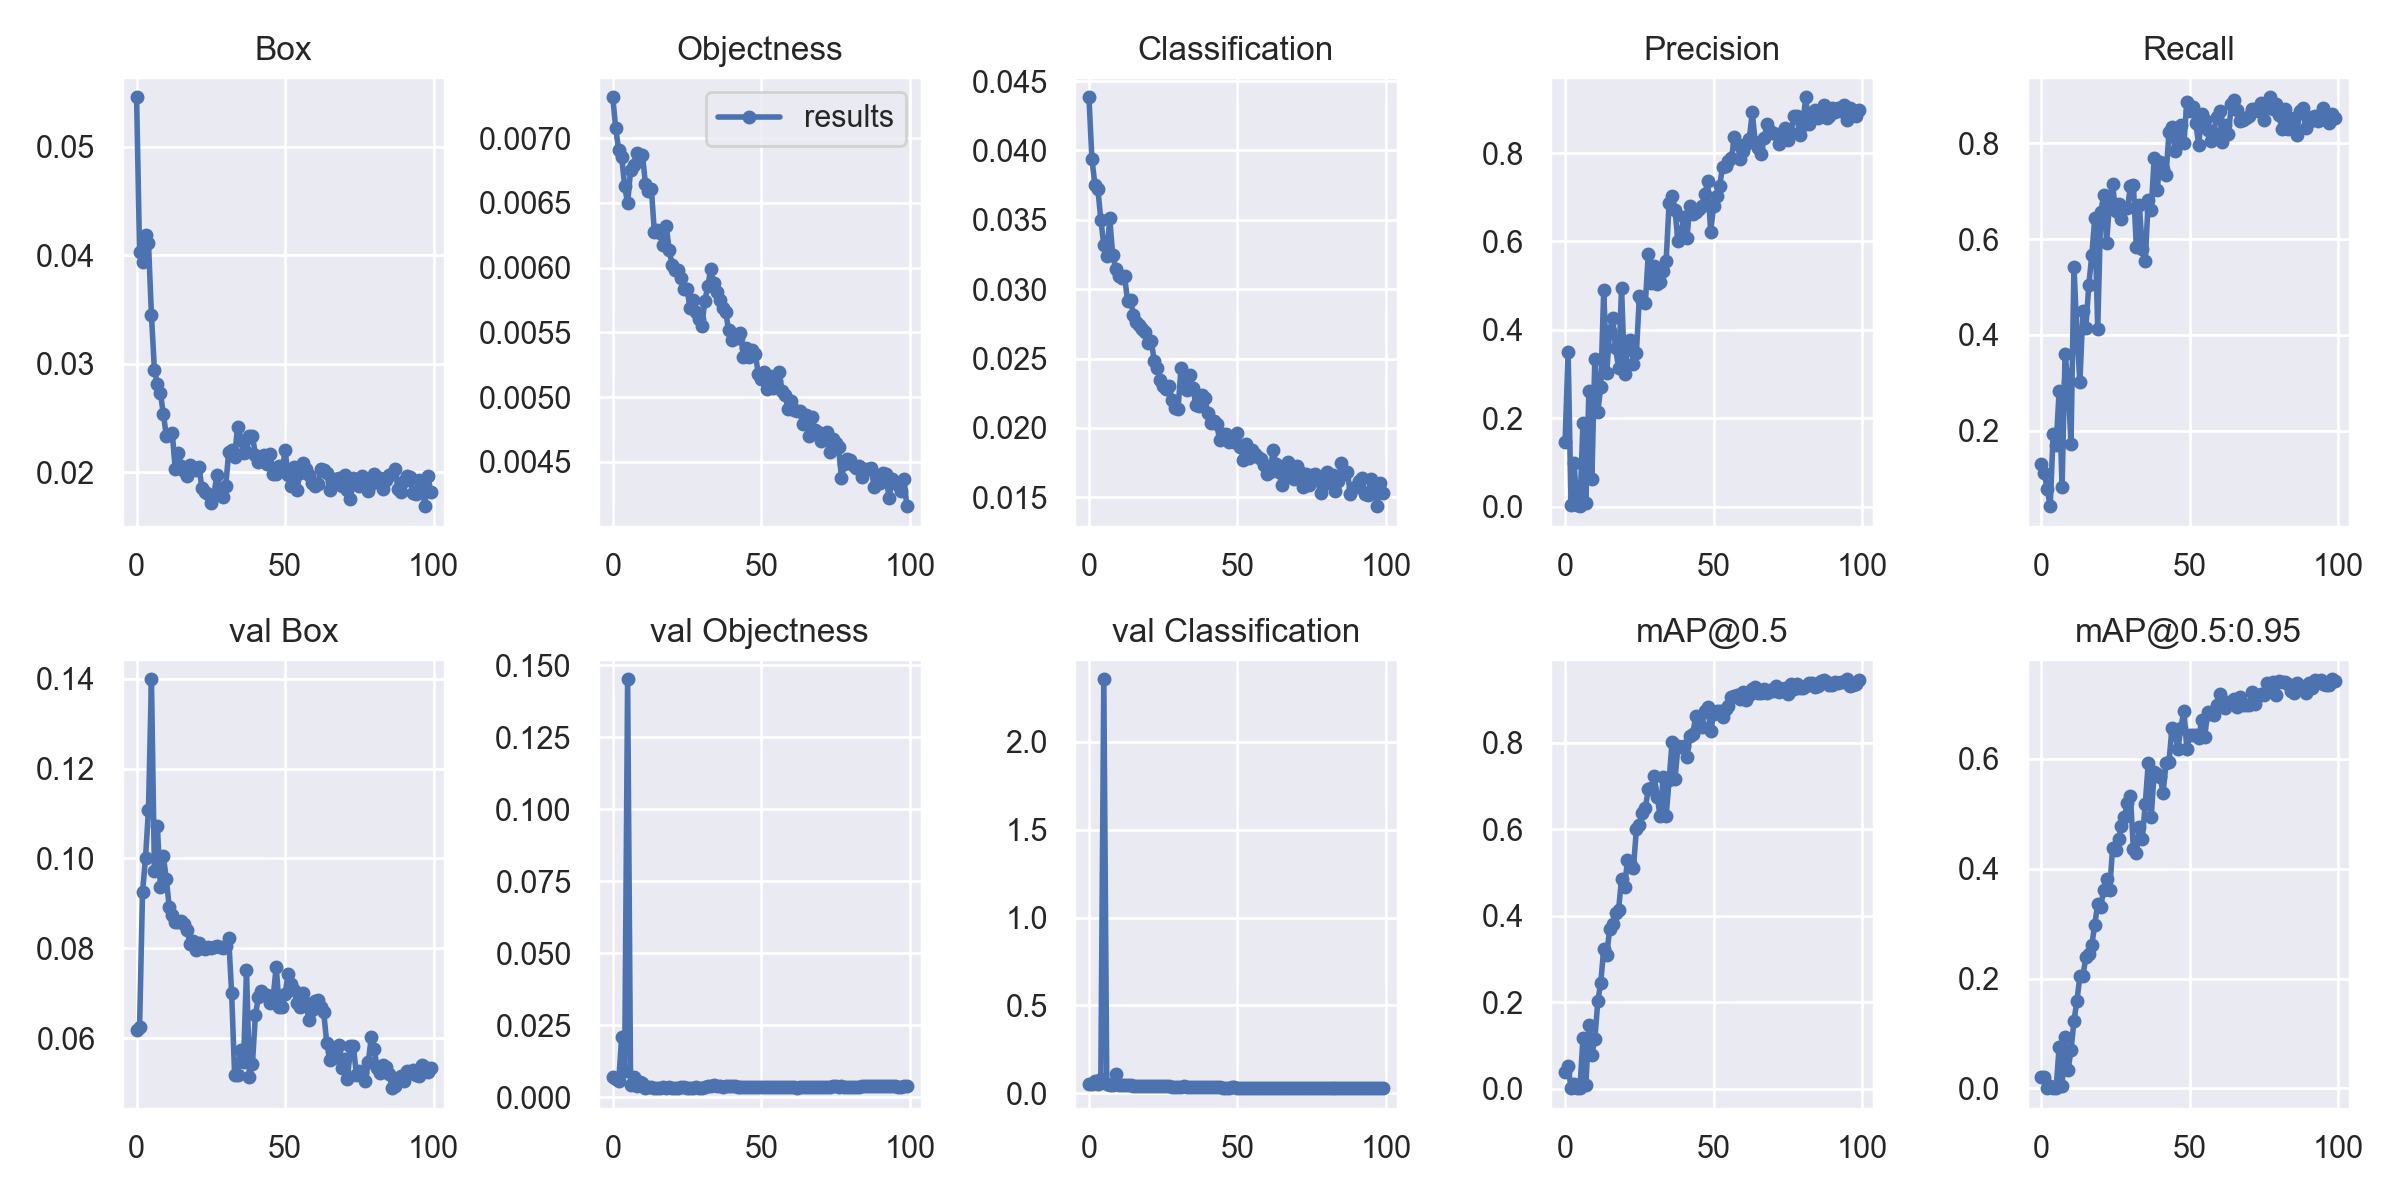

In [4]:
# to display images
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-asl/results.png', width=1000) 

In [13]:
%ls runs\train\yolov7-asl\weights


 Volume in drive C is Windows-SSD
 Volume Serial Number is AC93-BC77

 Directory of c:\Users\Bhoomi\Desktop\Codes\opencv\yolo_ASL\runs\train\yolov7-asl\weights

21-06-2025  16:18    <DIR>          .
21-06-2025  16:18    <DIR>          ..
21-06-2025  16:18        75,020,090 best.pt
21-06-2025  14:29       299,507,175 epoch_000.pt
21-06-2025  14:49       299,510,823 epoch_024.pt
21-06-2025  15:21       299,514,599 epoch_049.pt
21-06-2025  15:54       299,518,375 epoch_074.pt
21-06-2025  16:15       299,521,511 epoch_095.pt
21-06-2025  16:16       299,521,703 epoch_096.pt
21-06-2025  16:17       299,521,831 epoch_097.pt
21-06-2025  16:18       299,521,959 epoch_098.pt
21-06-2025  16:18       299,522,151 epoch_099.pt
21-06-2025  14:28       149,768,841 init.pt
21-06-2025  16:18        75,020,090 last.pt
              12 File(s)  2,995,469,148 bytes
               2 Dir(s)  273,158,197,248 bytes free


In [18]:
# use the best weights and print the test images list
!python yolov7/test.py --data data.yaml --img 416 --batch 8 --device 0 --weights runs/train/yolov7-asl/weights/best.pt --name yolov7-asl-test

Namespace(weights=['runs/train/yolov7-asl/weights/best.pt'], data='data.yaml', batch_size=8, img_size=416, conf_thres=0.001, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7-asl-test', exist_ok=False, no_trace=False, v5_metric=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

                 all         144         144       0.809       0.869       0.925       0.724
                   A         144           5       0.551           1       0.898       0.707
                   B         144           9       0.896       0.889       0.984       0.769
                   C         144           3       0.997           1       0.995       0.719
                   D         144           6       0.745  

YOLOR  v0.1-128-ga207844 torch 2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140.5MB)

c:\Users\Bhoomi\Desktop\Codes\opencv\yolo_ASL\yolov7\models\experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

In [21]:
!python yolov7/detect.py --weights runs/train/yolov7-asl/weights/best.pt --conf 0.25 --img-size 416 --source images --name yolov7-asl-detect

Namespace(weights=['runs/train/yolov7-asl/weights/best.pt'], source='images', img_size=416, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='yolov7-asl-detect', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 K, 1 V, Done. (20.3ms) Inference, (90.9ms) NMS
 The image with the result is saved in: runs\detect\yolov7-asl-detect3\test_asl_1.jpeg
1 L, 1 W, Done. (12.8ms) Inference, (2.0ms) NMS
 The image with the result is saved in: runs\detect\yolov7-asl-detect3\test_asl_2.jpeg
1 K, 2 Ls, Done. (9.0ms) Inference, (2.0ms) NMS
 The image with the result is saved in: runs\detect\yolov7-asl-detect3\test_asl_3.jpeg
1 R, Done. (12.4ms) Inference, (1.2ms) NMS
 The image wit

YOLOR  v0.1-128-ga207844 torch 2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140.5MB)

c:\Users\Bhoomi\Desktop\Codes\opencv\yolo_ASL\yolov7\models\experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

In [ ]:

# firstly, rename it with the name you want
%cd runs/train/yolov7-asl/weights/
os.rename("best.pt","Trained_yolov7.pt")


c:\Users\Bhoomi\Desktop\Codes\opencv\yolo_ASL\runs\train\yolov7-asl\weights


In [49]:
import os
print(os.getcwd())


c:\Users\Bhoomi\Desktop\Codes\opencv\yolo_ASL\runs\train\yolov7-asl\weights


In [54]:
import os
print(os.listdir('.'))


['epoch_000.pt', 'epoch_024.pt', 'epoch_049.pt', 'epoch_074.pt', 'epoch_095.pt', 'epoch_096.pt', 'epoch_097.pt', 'epoch_098.pt', 'epoch_099.pt', 'init.pt', 'last.pt', 'Trained_yolov7.pt']


In [57]:
import shutil
shutil.copy('Trained_yolov7.pt', '../../../../asl-volov7-model/Trained_yolov7.pt')


'../../../../asl-volov7-model/Trained_yolov7.pt'